# **Week 3 Outline** 
  1. OLS is unbiased and consistent estimate\
  2. Coverage rate-the meaning of confidence interval \
  3. Consequences of heteroskedasticity\

In [4]:
#install the packages 
options(warn=-1) #turn off the warning
pacman::p_load(gridExtra,ggplot2,dplyr,ggpubr,jtools,huxtable,ggstance)

## 1.OLS is unbiased and consistent

---

## Definition of Absolute Bias (AB)

  The estimator is $\hat{\theta}$

$$
AB=|\hat{\theta}-\theta|
$$

## Definition of Mean Sqaured Error (MSE)


$$
MSE=E[(\hat{\theta}-\theta)^2]
$$


---

## The Equations are 
  $$
  Y \sim X\beta_0 + X\beta_1 + \epsilon
  $$

  $$
  \epsilon\sim N(0,\sigma^2)
  $$
  
  $$
  y=0.2+0.5X+\epsilon
  $$
  $$
  \epsilon\sim N(0,1)
  $$
  
  
  ### 1.1 When the sample size is 20 and number of simulation is 100

[1] 0.1917019

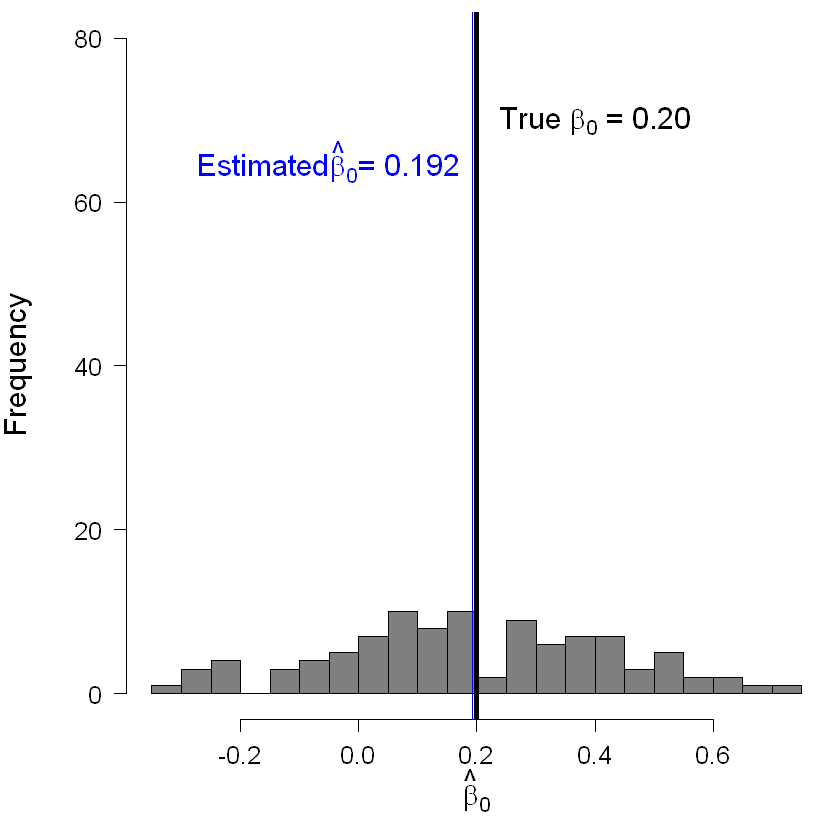

[1] 0.5443929

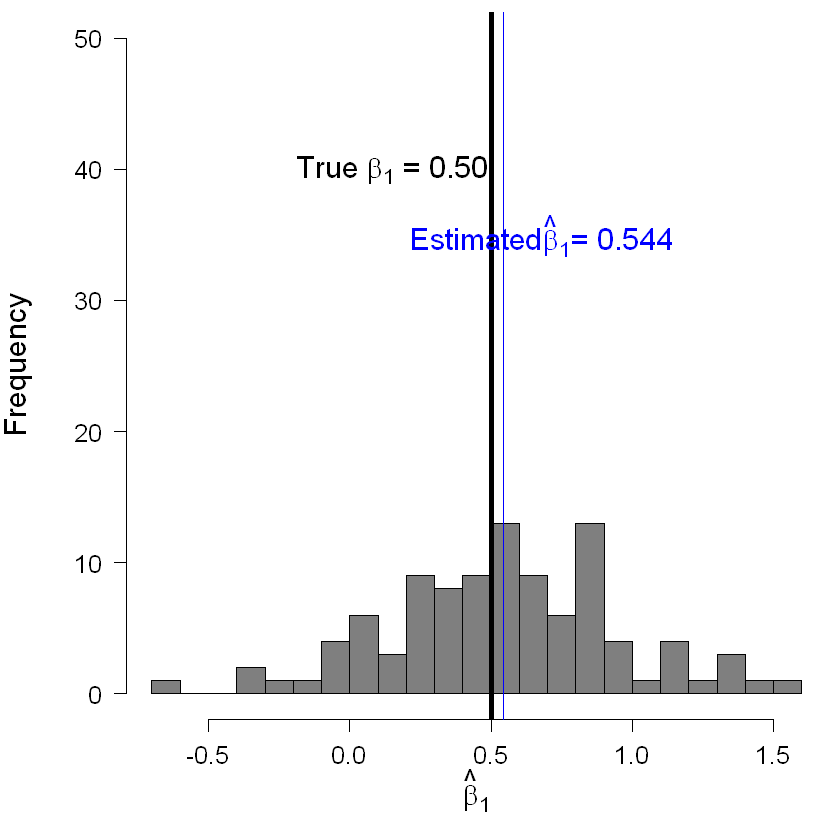

In [5]:
set.seed(123456) # Set the seed for reproducible results

reps <- 100 # Set the number of repetitions at the top of the script
par.est <- matrix(NA, nrow = reps, ncol = 4) # Empty matrix to store the
                                             # estimates 
b0 <- .2 # True value for the intercept
b1 <- .5 # True value for the slope
n <- 20 # Sample size
X <- runif(n, -1, 1) # Create a sample of n observations on the 
                     # independent variable X

for(i in 1:reps){ # Start the loop
Y <- b0 + b1*X + rnorm(n, 0, 1) # The true DGP, with N(0, 1) error
model <- lm(Y ~ X) # Estimate OLS model
vcv <- vcov(model) # Variance-covariance matrix
par.est[i, 1] <- model$coef[1] # Put the estimate for the intercept
                               # in the first column
par.est[i, 2] <- model$coef[2] # Put the estimate for the coefficient on
                               # X in the second column
par.est[i, 3] <- sqrt(diag(vcv)[1]) # SE of the intercept
par.est[i, 4] <- sqrt(diag(vcv)[2]) # SE of the coefficient on X
} # End the loop

# Coefficients
# Absolute Bias
ab.beta20_int<- mean(abs(par.est[ , 1] - b0))
ab.beta20_slp<- mean(abs(par.est[ , 2] - b1)) 

# Mean Square Error
mse.beta20_int<- mean((par.est[ , 1] - b0)^2)
mse.beta20_slp<- mean((par.est[ , 2] - b1)^2)

perform_1<-cbind(ab.beta20_int,ab.beta20_slp,mse.beta20_int,mse.beta20_slp)

# Standard Errors
# Standard Deviation
sd.beta0 <- sd(par.est[ , 1]) # SD of the intercept estimates
mean.se.beta0 <- mean(par.est[ , 3]) # Mean SE of the intercept

sd.beta1 <- sd(par.est[ , 2]) # SD of the coefficient on X estimates
mean.se.beta1 <- mean(par.est[ , 4]) # Mean SE of the coefficient on X

#plot the 100 estimates for intercept & 
par(mar = c(5, 5.25, .5, .5))
hist(par.est[ , 1], breaks = 25, col = "gray50", ylim = c(0, 80), xlab = "",
 ylab = "", main = "", axes = FALSE)
axis(1, cex.axis = 1.25)
axis(2, cex.axis = 1.25, las = 2)
title(xlab = expression(hat(beta)[0]), cex.lab = 1.5)
title(ylab = expression("Frequency"), line = 3.75, cex.lab = 1.5)
abline(v = b0, lwd = 4)
text(.4, 70, expression("True"~beta[0]~"= 0.20"), cex = 1.5)
abline(v=mean(par.est[ , 1]),col='blue')
estimate<-mean(par.est[ , 1])
estimate
text(-0.05, 65,expression(paste("Estimated",hat(beta)[0],"= 0.192")),cex = 1.5,col="Blue")

#plot the 100 estimates for slope  
par(mar = c(5, 5.25, .5, .5))
hist(par.est[ , 2], breaks = 25, col = "gray50", ylim = c(0, 50), xlab = "",
 ylab = "", main = "", axes = FALSE)
axis(1, cex.axis = 1.25)
axis(2, cex.axis = 1.25, las = 2)
title(xlab = expression(hat(beta)[1]), cex.lab = 1.5)
title(ylab = expression("Frequency"), line = 3.75, cex.lab = 1.5)
abline(v = b1, lwd = 4)
text(.15, 40, expression("True"~beta[1]~"= 0.50"), cex = 1.5)
abline(v=mean(par.est[ , 2]),col='blue')
estimate2<-mean(par.est[ , 2])
estimate2
text(.68, 35,expression(paste("Estimated",hat(beta)[1],"= 0.544")),cex = 1.5,col="Blue")


### 1.2 When the sample is 100 & simulation is 100

[1] 0.2164031

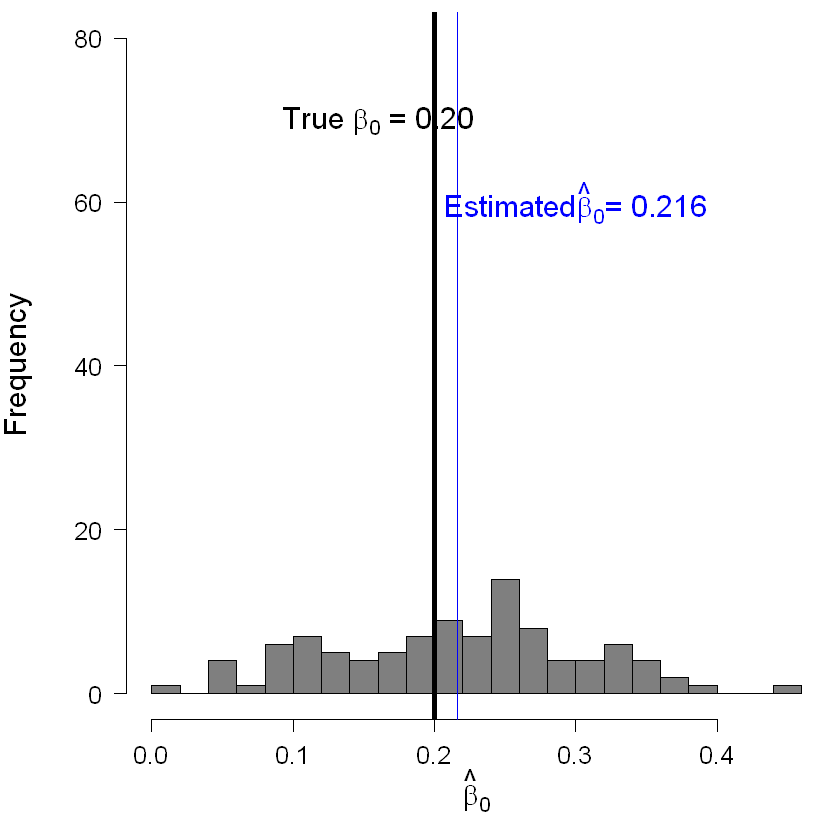

[1] 0.5055739

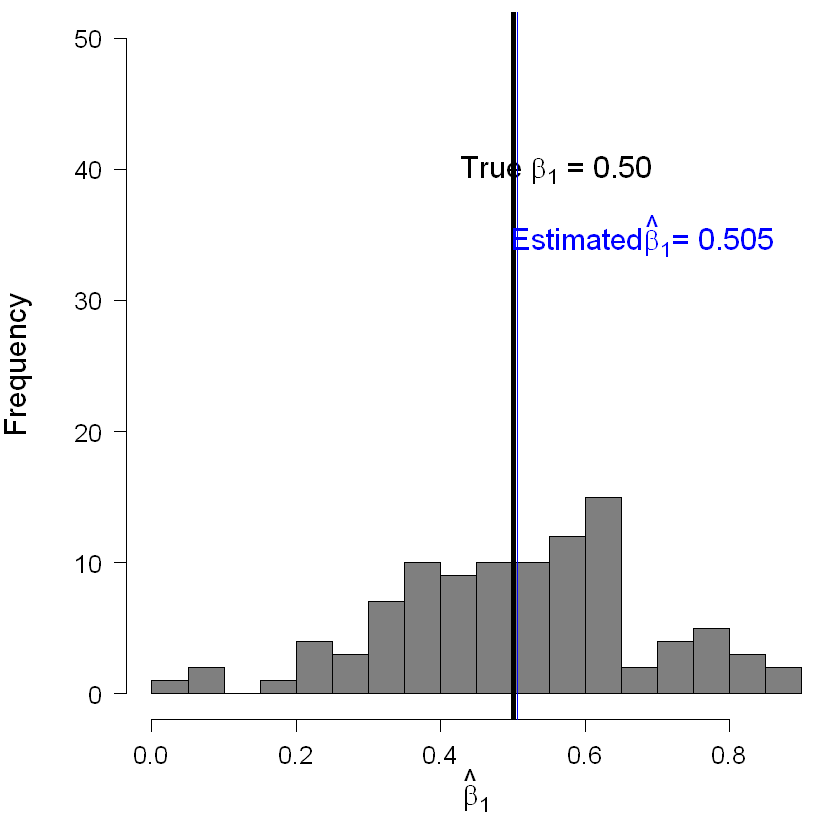

In [6]:
set.seed(123456) # Set the seed for reproducible results

reps <- 100 # Set the number of repetitions at the top of the script
par.est <- matrix(NA, nrow = reps, ncol = 4) # Empty matrix to store the
                                             # estimates 
b0 <- .2 # True value for the intercept
b1 <- .5 # True value for the slope
n <- 100 # Sample size
X <- runif(n, -1, 1) # Create a sample of n observations on the 
                     # independent variable X

for(i in 1:reps){ # Start the loop
Y <- b0 + b1*X + rnorm(n, 0, 1) # The true DGP, with N(0, 1) error
model <- lm(Y ~ X) # Estimate OLS model
vcv <- vcov(model) # Variance-covariance matrix
par.est[i, 1] <- model$coef[1] # Put the estimate for the intercept
                               # in the first column
par.est[i, 2] <- model$coef[2] # Put the estimate for the coefficient on
                               # X in the second column
par.est[i, 3] <- sqrt(diag(vcv)[1]) # SE of the intercept
par.est[i, 4] <- sqrt(diag(vcv)[2]) # SE of the coefficient on X
} # End the loop

# Coefficients
# Absolute Bias
ab.beta100_int<- mean(abs(par.est[ , 1] - b0))
ab.beta100_slp<- mean(abs(par.est[ , 2] - b1)) 

# MSE
mse.beta100_int<- mean((par.est[ , 1] - b0)^2)
mse.beta100_slp<- mean((par.est[ , 2] - b1)^2)

perform_2<-cbind(ab.beta100_int,ab.beta100_slp,mse.beta100_int,mse.beta100_slp)

# Standard Errors
# Standard Deviation
sd.beta0 <- sd(par.est[ , 1]) # SD of the intercept estimates
mean.se.beta0 <- mean(par.est[ , 3]) # Mean SE of the intercept

sd.beta1 <- sd(par.est[ , 2]) # SD of the coefficient on X estimates
mean.se.beta1 <- mean(par.est[ , 4]) # Mean SE of the coefficient on X

#plot the 100 estimates for intercept & 
par(mar = c(5, 5.25, .5, .5))
hist(par.est[ , 1], breaks = 25, col = "gray50", ylim = c(0, 80), xlab = "",
 ylab = "", main = "", axes = FALSE)
axis(1, cex.axis = 1.25)
axis(2, cex.axis = 1.25, las = 2)
title(xlab = expression(hat(beta)[0]), cex.lab = 1.5)
title(ylab = expression("Frequency"), line = 3.75, cex.lab = 1.5)
abline(v = b0, lwd = 4)
text(.16, 70, expression("True"~beta[0]~"= 0.20"), cex = 1.5)
abline(v=mean(par.est[ , 1]),col='blue')
estimate3<-mean(par.est[ , 1])
estimate3
text(.30,60,expression(paste("Estimated",hat(beta)[0],"= 0.216")),cex = 1.5,col="Blue")

#plot the 100 estimates for slope & #save the plot to a pdf 
par(mar = c(5, 5.25, .5, .5))
hist(par.est[ , 2], breaks = 25, col = "gray50", ylim = c(0, 50), xlab = "",
 ylab = "", main = "", axes = FALSE)
axis(1, cex.axis = 1.25)
axis(2, cex.axis = 1.25, las = 2)
title(xlab = expression(hat(beta)[1]), cex.lab = 1.5)
title(ylab = expression("Frequency"), line = 3.75, cex.lab = 1.5)
abline(v = b1, lwd = 4)
text(.56, 40, expression("True"~beta[1]~"= 0.50"), cex = 1.5)
abline(v=mean(par.est[ , 2]),col='blue')
estimate4<-mean(par.est[ , 2])
estimate4
text(.68, 35,expression(paste("Estimated",hat(beta)[1],"= 0.505")),cex = 1.5,col="Blue")

### 1.3 When the sample size is 100 and number of simulation is 1000

[1] 0.5071761

[1] 0.2033708

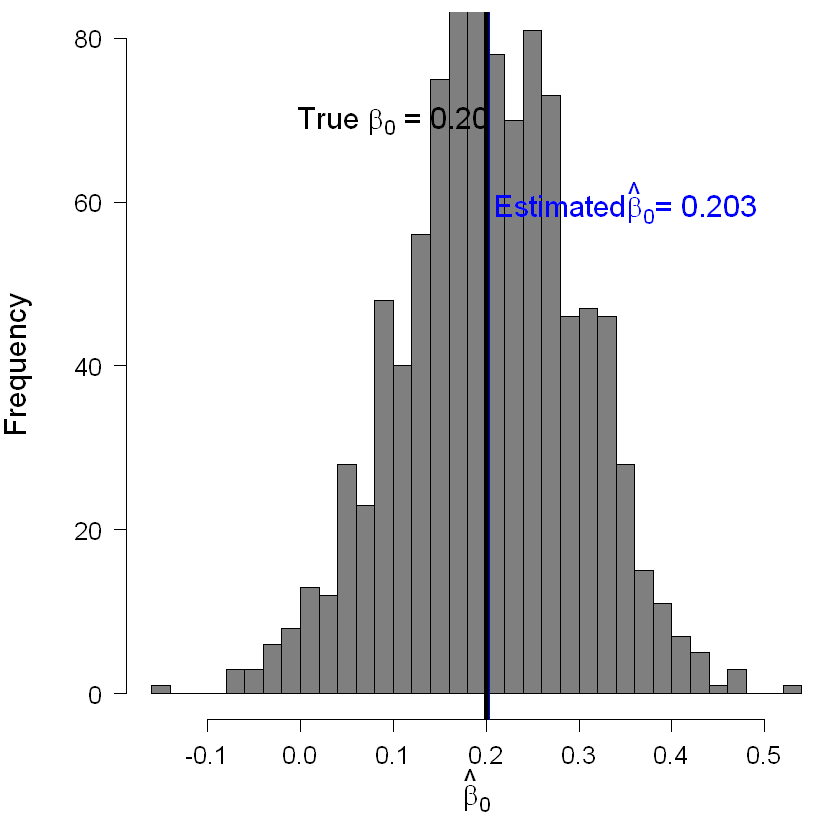

[1] 0.5071761

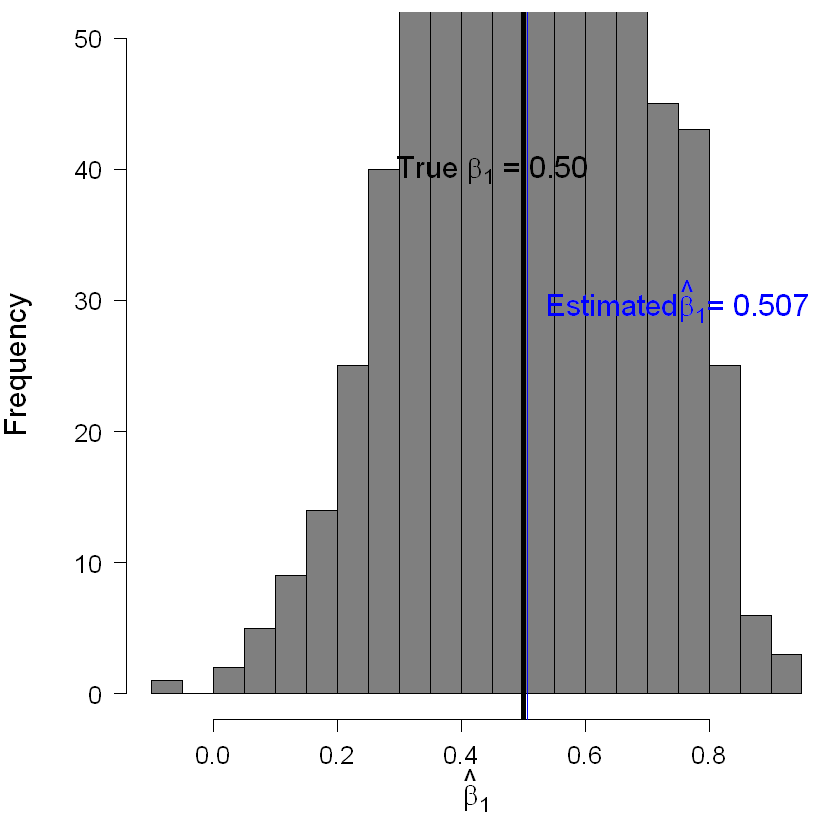

In [7]:
set.seed(123456) # Set the seed for reproducible results

reps <- 1000 # Set the number of repetitions at the top of the script
par.est <- matrix(NA, nrow = reps, ncol = 4) # Empty matrix to store the
                                             # estimates 
b0 <- .2 # True value for the intercept
b1 <- .5 # True value for the slope
n <- 100 # Sample size
X <- runif(n, -1, 1) # Create a sample of n observations on the 
                     # independent variable X

for(i in 1:reps){ # Start the loop
Y <- b0 + b1*X + rnorm(n, 0, 1) # The true DGP, with N(0, 1) error
model <- lm(Y ~ X) # Estimate OLS model
vcv <- vcov(model) # Variance-covariance matrix
par.est[i, 1] <- model$coef[1] # Put the estimate for the intercept
                               # in the first column
par.est[i, 2] <- model$coef[2] # Put the estimate for the coefficient on
                               # X in the second column
par.est[i, 3] <- sqrt(diag(vcv)[1]) # SE of the intercept
par.est[i, 4] <- sqrt(diag(vcv)[2]) # SE of the coefficient on X
} # End the loop

# Coefficients
# Absolute Bias
ab.beta1000_int <- mean(abs(par.est[ , 1] - b0))
ab.beta1000_slp <- mean(abs(par.est[ , 2] - b1)) 

mean(par.est[ , 2])

# MSE
mse.beta1000_int<- mean((par.est[ , 1] - b0)^2)
mse.beta1000_slp <- mean((par.est[ , 2] - b1)^2)

perform_3<-cbind(ab.beta1000_int,ab.beta1000_slp,mse.beta1000_int,mse.beta1000_slp)
# Standard Errors
# Standard Deviation
sd.beta0 <- sd(par.est[ , 1]) # SD of the intercept estimates
mean.se.beta0 <- mean(par.est[ , 3]) # Mean SE of the intercept

sd.beta1 <- sd(par.est[ , 2]) # SD of the coefficient on X estimates
mean.se.beta1 <- mean(par.est[ , 4]) # Mean SE of the coefficient on X

#plot the 1000 estimates for intercept 
par(mar = c(5, 5.25, .5, .5))
hist(par.est[ , 1], breaks = 25, col = "gray50", ylim = c(0, 80), xlab = "",
 ylab = "", main = "", axes = FALSE)
axis(1, cex.axis = 1.25)
axis(2, cex.axis = 1.25, las = 2)
title(xlab = expression(hat(beta)[0]), cex.lab = 1.5)
title(ylab = expression("Frequency"), line = 3.75, cex.lab = 1.5)
abline(v = b0, lwd = 4)
text(.1, 70, expression("True"~beta[0]~"= 0.20"), cex = 1.5)
abline(v=mean(par.est[ , 1]),col='blue')
estimate5<-mean(par.est[ , 1])
estimate5
text(.35, 60,expression(paste("Estimated",hat(beta)[0],"= 0.203")),cex = 1.5,col="Blue")

#plot the 1000 estimates for slope 
par(mar = c(5, 5.25, .5, .5))
hist(par.est[ , 2], breaks = 25, col = "gray50", ylim = c(0, 50), xlab = "",
 ylab = "", main = "", axes = FALSE)
axis(1, cex.axis = 1.25)
axis(2, cex.axis = 1.25, las = 2)
title(xlab = expression(hat(beta)[1]), cex.lab = 1.5)
title(ylab = expression("Frequency"), line = 3.75, cex.lab = 1.5)
abline(v = b1, lwd = 4)
text(.45, 40, expression("True"~beta[1]~"= 0.50"), cex = 1.5)
abline(v=mean(par.est[ , 2]),col='blue')
estimate6<-mean(par.est[ , 2])
estimate6
text(.75, 30,expression(paste("Estimated",hat(beta)[1],"= 0.507")),cex = 1.5,col="Blue")

[1] 0.4971488

[1] 0.1993926

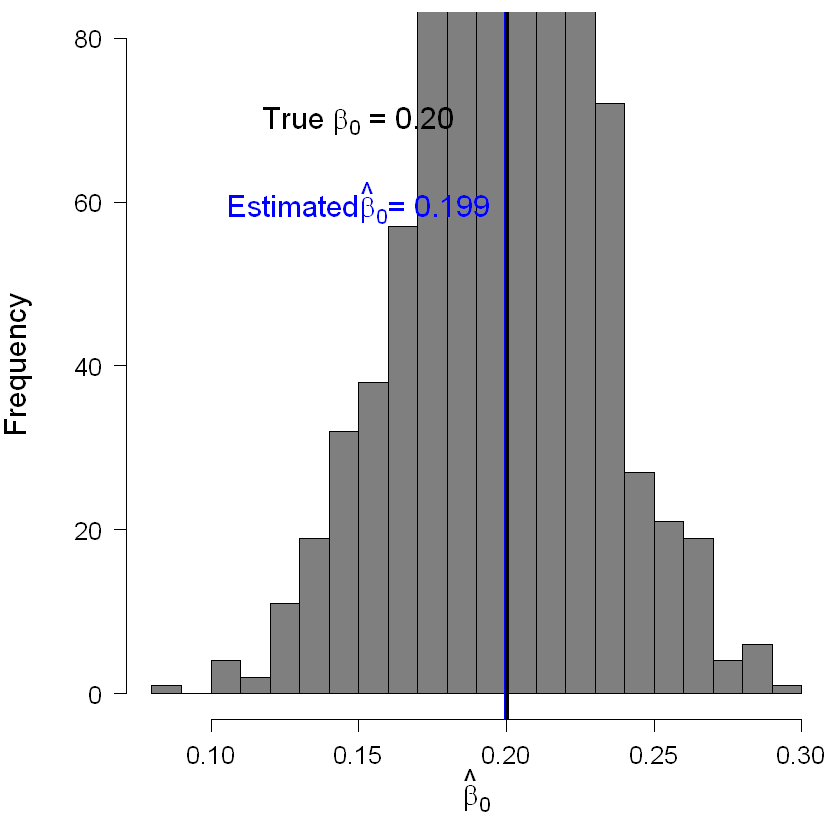

[1] 0.4971488

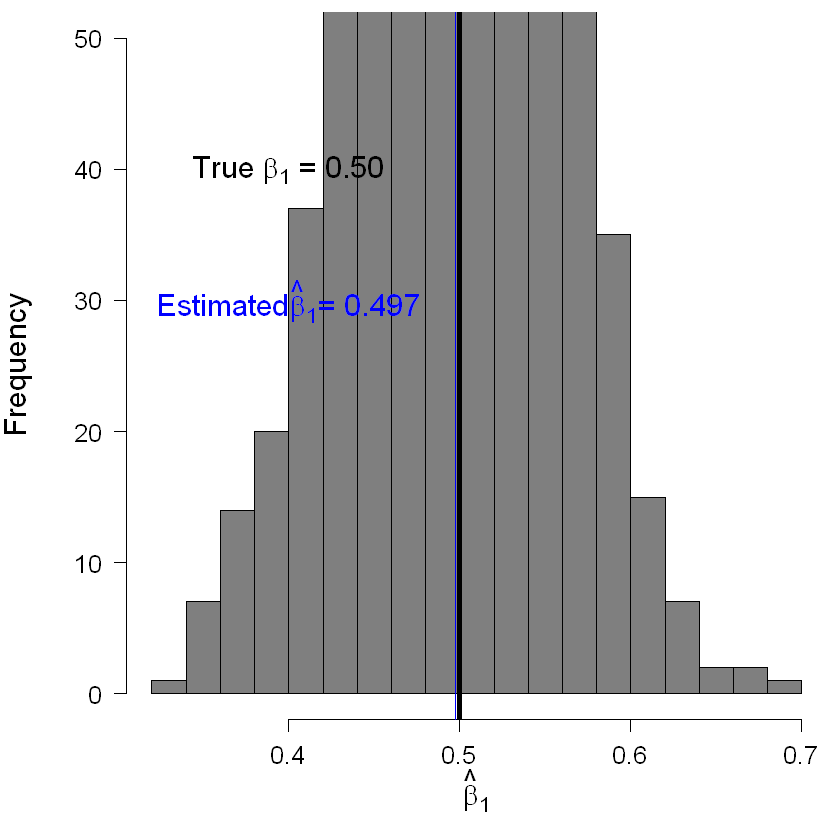

In [16]:
### 1.4 When the sample size is 1000 and number of simulation is 1000
set.seed(123456) # Set the seed for reproducible results

reps <- 1000 # Set the number of repetitions at the top of the script
par.est <- matrix(NA, nrow = reps, ncol = 4) # Empty matrix to store the
                                             # estimates 
b0 <- .2 # True value for the intercept
b1 <- .5 # True value for the slope
n <- 1000 # Sample size
X <- runif(n, -1, 1) # Create a sample of n observations on the 
                     # independent variable X

for(i in 1:reps){ # Start the loop
Y <- b0 + b1*X + rnorm(n, 0, 1) # The true DGP, with N(0, 1) error
model <- lm(Y ~ X) # Estimate OLS model
vcv <- vcov(model) # Variance-covariance matrix
par.est[i, 1] <- model$coef[1] # Put the estimate for the intercept
                               # in the first column
par.est[i, 2] <- model$coef[2] # Put the estimate for the coefficient on
                               # X in the second column
par.est[i, 3] <- sqrt(diag(vcv)[1]) # SE of the intercept
par.est[i, 4] <- sqrt(diag(vcv)[2]) # SE of the coefficient on X
} # End the loop

# Coefficients
# Absolute Bias
ab.beta10002_int <- mean(abs(par.est[ , 1] - b0))
ab.beta10002_slp <- mean(abs(par.est[ , 2] - b1)) 

mean(par.est[ , 2])

# MSE
mse.beta10002_int<- mean((par.est[ , 1] - b0)^2)
mse.beta10002_slp <- mean((par.est[ , 2] - b1)^2)

perform_4<-cbind(ab.beta10002_int,ab.beta10002_slp,mse.beta10002_int,mse.beta10002_slp)
# Standard Errors
# Standard Deviation
sd.beta0 <- sd(par.est[ , 1]) # SD of the intercept estimates
mean.se.beta0 <- mean(par.est[ , 3]) # Mean SE of the intercept

sd.beta1 <- sd(par.est[ , 2]) # SD of the coefficient on X estimates
mean.se.beta1 <- mean(par.est[ , 4]) # Mean SE of the coefficient on X

#plot the 1000 estimates for intercept 
par(mar = c(5, 5.25, .5, .5))
hist(par.est[ , 1], breaks = 25, col = "gray50", ylim = c(0, 80), xlab = "",
 ylab = "", main = "", axes = FALSE)
axis(1, cex.axis = 1.25)
axis(2, cex.axis = 1.25, las = 2)
title(xlab = expression(hat(beta)[0]), cex.lab = 1.5)
title(ylab = expression("Frequency"), line = 3.75, cex.lab = 1.5)
abline(v = b0, lwd = 4)
text(.15, 70, expression("True"~beta[0]~"= 0.20"), cex = 1.5)
abline(v=mean(par.est[ , 1]),col='blue')
estimate7<-mean(par.est[ , 1])
estimate7
text(.15, 60,expression(paste("Estimated",hat(beta)[0],"= 0.199")),cex = 1.5,col="Blue")

#plot the 1000 estimates for slope 
par(mar = c(5, 5.25, .5, .5))
hist(par.est[ , 2], breaks = 25, col = "gray50", ylim = c(0, 50), xlab = "",
 ylab = "", main = "", axes = FALSE)
axis(1, cex.axis = 1.25)
axis(2, cex.axis = 1.25, las = 2)
title(xlab = expression(hat(beta)[1]), cex.lab = 1.5)
title(ylab = expression("Frequency"), line = 3.75, cex.lab = 1.5)
abline(v = b1, lwd = 4)
text(.40, 40, expression("True"~beta[1]~"= 0.50"), cex = 1.5)
abline(v=mean(par.est[ , 2]),col='blue')
estimate8<-mean(par.est[ , 2])
estimate8
text(.40,30,expression(paste("Estimated",hat(beta)[1],"= 0.497")),cex = 1.5,col="Blue")


### 1.5 Compare the results

In [18]:
result<-rbind(perform_1,perform_2,perform_3,perform_4)
colnames(result)<-c("Ab_Err_Intercept","Ab_Err_Slope","MSE_Intercpet","MSE_Slope")
rownames(result)<-c("N:20,R:100","N:100,R:100","N:100,R:1000","N:1000,R:1000")
round(print(result),4)




              Ab_Err_Intercept Ab_Err_Slope MSE_Intercpet   MSE_Slope
N:20,R:100          0.19455882   0.32288745  0.0558454680 0.171167275
N:100,R:100         0.07570179   0.14321149  0.0082584955 0.031459357
N:100,R:1000        0.07634630   0.12799526  0.0091989581 0.025997593
N:1000,R:1000       0.02466789   0.04389335  0.0009851733 0.003031893


,Ab_Err_Intercept,Ab_Err_Slope,MSE_Intercpet,MSE_Slope
"N:20,R:100",0.1946,0.3229,0.0558,0.1712
"N:100,R:100",0.0757,0.1432,0.0083,0.0315
"N:100,R:1000",0.0763,0.1280,0.0092,0.0260
"N:1000,R:1000",0.0247,0.0439,0.0010,0.0030


## 2 Coverage rage-the meaning of confidence interval

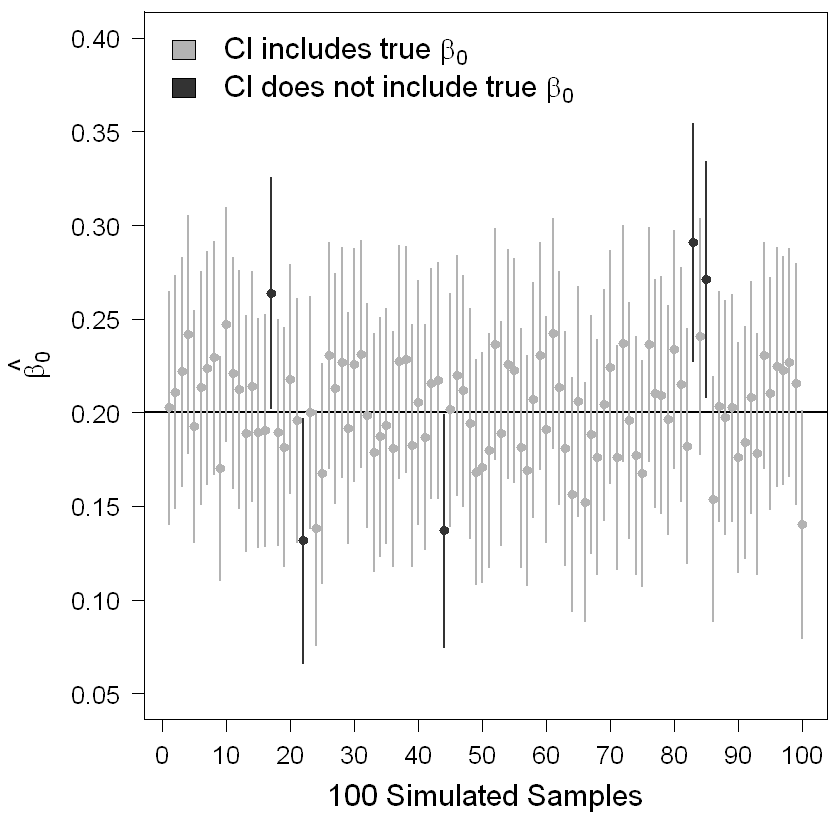

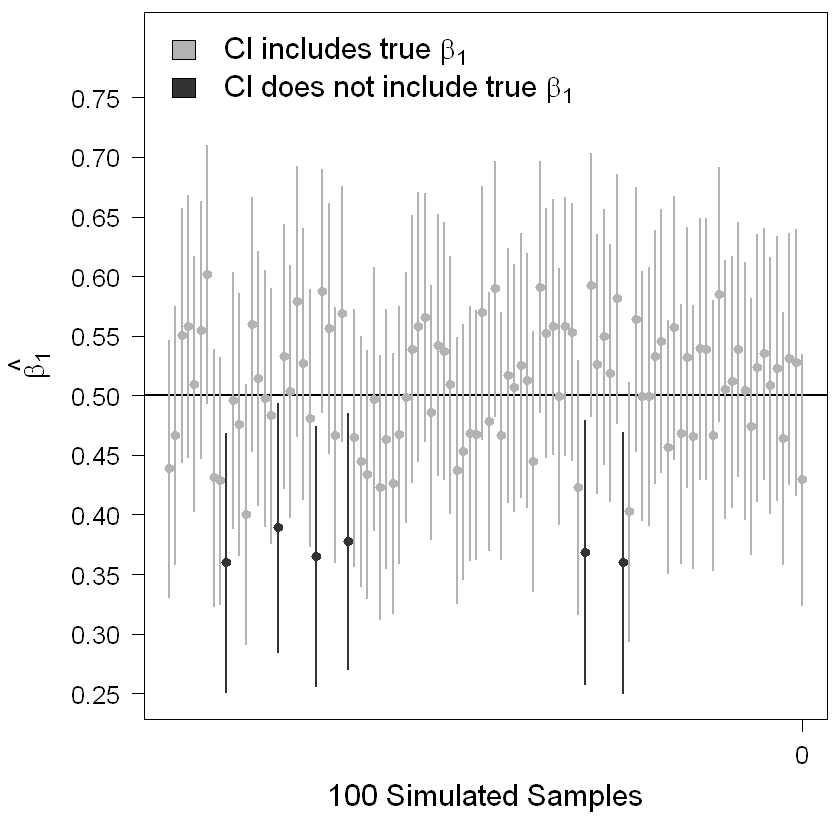

In [19]:

# CP Function
coverage <- function(b, se, true, level = .95, df = Inf){ # Estimate, 
                                                          # standard error,
                                                          # true parameter, 
                                                          # confidence level, 
                                                          # and df  
qtile <- level + (1 - level)/2 # Compute the proper quantile
lower.bound <- b - qt(qtile, df = df)*se # Lower bound
upper.bound <- b + qt(qtile, df = df)*se # Upper bound 
# Is the true parameter in the confidence interval? (yes = 1)
true.in.ci <- ifelse(true >= lower.bound & true <= upper.bound, 1, 0)
cp <- mean(true.in.ci) # The coverage probability
mc.lower.bound <- cp - 1.96*sqrt((cp*(1 - cp))/length(b)) # Monte Carlo error  
mc.upper.bound <- cp + 1.96*sqrt((cp*(1 - cp))/length(b))  
return(list(coverage.probability = cp, # Return results
            true.in.ci = true.in.ci,
            ci = cbind(lower.bound, upper.bound),
            mc.eb = c(mc.lower.bound, mc.upper.bound)))
}

cp.beta0 <- coverage(par.est[ , 1], par.est[ , 3], b0, df = n - model$rank)
cp.beta1 <- coverage(par.est[ , 2], par.est[ , 4], b1, df = n - model$rank)


par(mar = c(5, 6, .5, .5))
plot(seq(1, 100, length = 100), seq(.05, .4, length = 100), type = "n",
 axes = FALSE, xlab = "", ylab = "")
title(xlab = expression("100 Simulated Samples"), cex.lab = 1.5)
title(ylab = expression(hat(beta[0])), line = 3.75, cex.lab = 1.5)
box()
axis(1, at = seq(0, 100, 10), cex.axis = 1.25)
axis(2, at = seq(.05, 4, .05), cex.axis = 1.25, las = 2)
abline(h = b0, lwd = 2)
for (i in 1:100){
points(i, par.est[i, 1], lwd = 2, col = ifelse(cp.beta0$true.in.ci[i] == 1,
 "gray70", "gray20"), pch = 19)
segments(i, cp.beta0$ci[i, 1], i, cp.beta0$ci[i, 2], lwd = 2,
 col = ifelse(cp.beta0$true.in.ci[i] == 1, "gray70", "gray20"))
}
legend("topleft", bty = "n", c(expression("CI includes true"~beta[0]),
 expression("CI does not include true"~beta[0])),
  fill = c("gray70", "gray20"), cex = 1.5) 


par(mar = c(5, 6, .5, .5))
plot(seq(1, 100, length = 100), seq(.25, .8, length = 100), type = "n",
 axes = FALSE, xlab = "", ylab = "")
title(xlab = expression("100 Simulated Samples"), cex.lab = 1.5)
title(ylab = expression(hat(beta[1])), line = 3.75, cex.lab = 1.5)
box()
axis(1, at = seq(100, 200, 10), labels = seq(0, 100, 10), cex.axis = 1.25)
axis(2, at = seq(.25, .75, .05), cex.axis = 1.25, las = 2)
abline(h = b1, lwd = 2)
for (i in 1:100){
points(i, par.est[i, 2], lwd = 2, col = ifelse(cp.beta1$true.in.ci[i] == 1,
 "gray70", "gray20"), pch = 19)
segments(i, cp.beta1$ci[i, 1], i, cp.beta1$ci[i, 2], lwd = 2,
 col = ifelse(cp.beta1$true.in.ci[i] == 1, "gray70", "gray20"))
}
legend("topleft", bty = "n", c(expression("CI includes true"~beta[1]),
 expression("CI does not include true"~beta[1])),
  fill = c("gray70", "gray20"), cex = 1.5) 


## 3Consequences of Heteroskedasticity

* Now the Equations become 
  $$
  Y \sim X\beta_0 + X\beta_1 + \epsilon
  $$

  $$
  \epsilon\sim N(0,exp(1.5X)^2)
  $$
 $$
 Y=0.2+0.5X+\epsilon
 $$
 
  $$
  \epsilon\sim N(0,exp(1.5x)^2)
  $$
  ### 3.1run the model when the assumption of homoscedasticity is violated

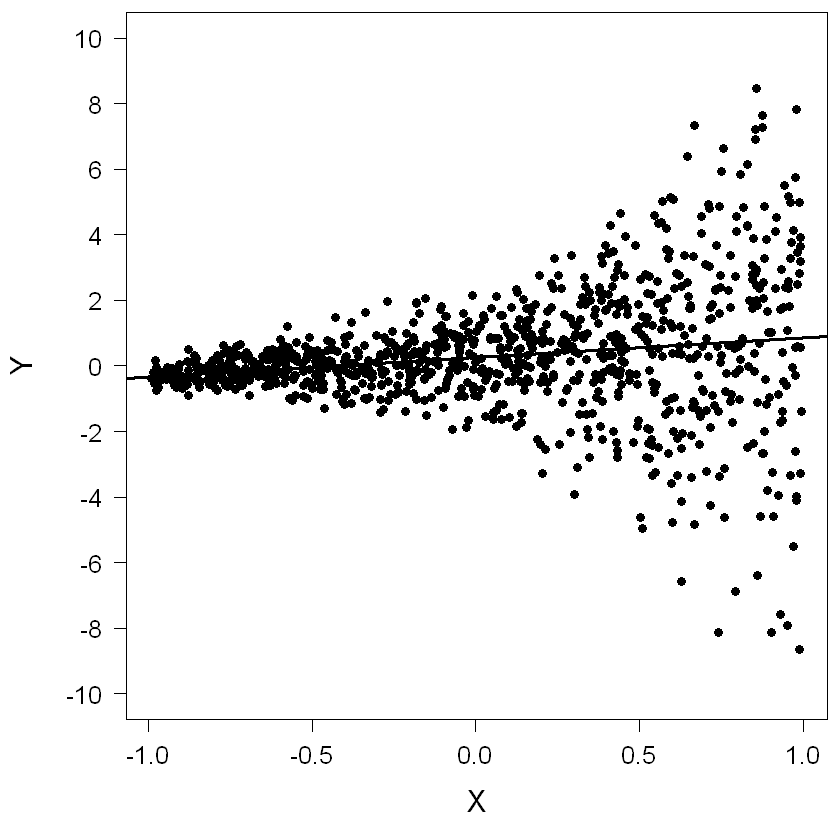

In [23]:
# Heteroskedasticity (Simulation 1 of 3)
set.seed(100484) # Set the seed for reproducible results

reps <- 1000 # Set the number of repetitions at the top of the script
par.est.ncv <- matrix(NA, nrow = reps, ncol = 4) # Empty matrix to store the
                                                 # estimates
sigma.est <- numeric(reps) # Empty vector to store sigma 
b0 <- .2 # True value for the intercept
b1 <- .5 # True value for the slope
n <- 1000 # Sample size
X <- runif(n, -1, 1) # Create a sample of n observations on the 
                     # independent variable X
gamma <- 1.5 # Heteroskedasticity parameter

for(i in 1:reps){ # Start the loop
Y <- b0 + b1*X + rnorm(n, 0, exp(X*gamma)) # Now the error variance is a 
                                           # function of X plus random noise
model <- lm(Y ~ X) # Estimate OLS model
sigma.est[i] <- summary(model)$sigma # Store sigma
vcv <- vcov(model) # Variance-covariance matrix
par.est.ncv[i, 1] <- model$coef[1] # Put the estimate for the intercept
                                   # in the first column
par.est.ncv[i, 2] <- model$coef[2] # Put the estimate for the coefficient on
                                   # X in the second column
par.est.ncv[i, 3] <- sqrt(diag(vcv)[1]) # SE of the intercept
par.est.ncv[i, 4] <- sqrt(diag(vcv)[2]) # SE of the coefficient on X
} # End the loop


par(mar = c(5, 5.25, .5, .5))
plot(X, Y, ylim = c(-10, 10), axes = FALSE, xlab = "",
 ylab = "", pch = 19)
title(xlab = expression("X"), cex.lab = 1.5)
title(ylab = expression("Y"), line = 3.75, cex.lab = 1.5)
box()
abline(lsfit(X, Y), lwd = 3)
axis(1, cex.axis = 1.25)
axis(2, at = seq(-10, 10, 2), cex.axis = 1.25, las = 2)


### 3.2 Do a comparison between models with and without the violation

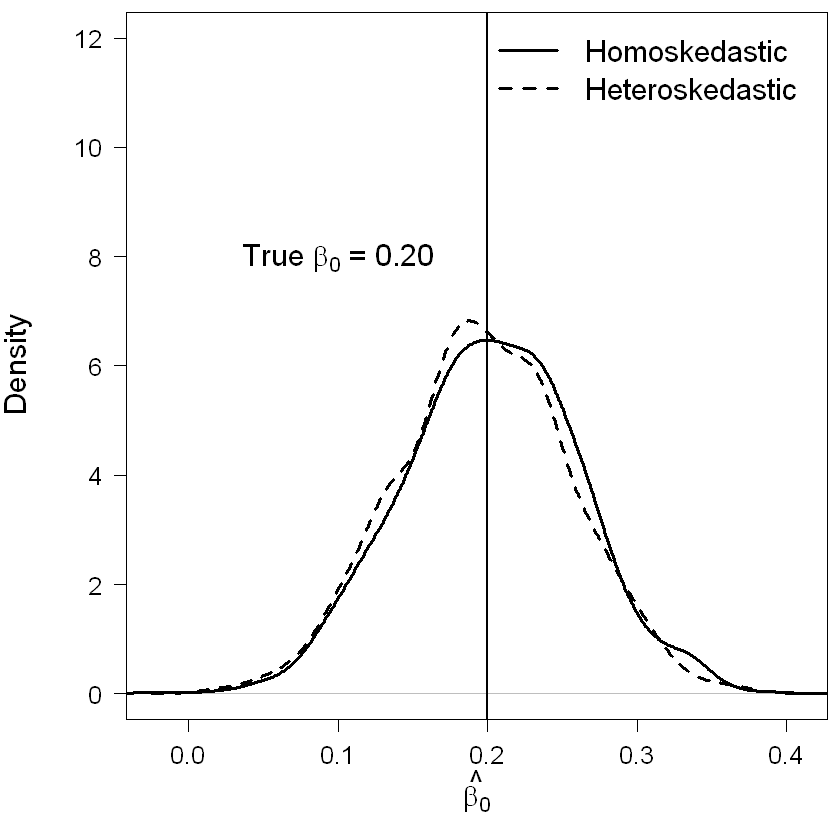

[1] 0.957

[1] 0.9444268 0.9695732

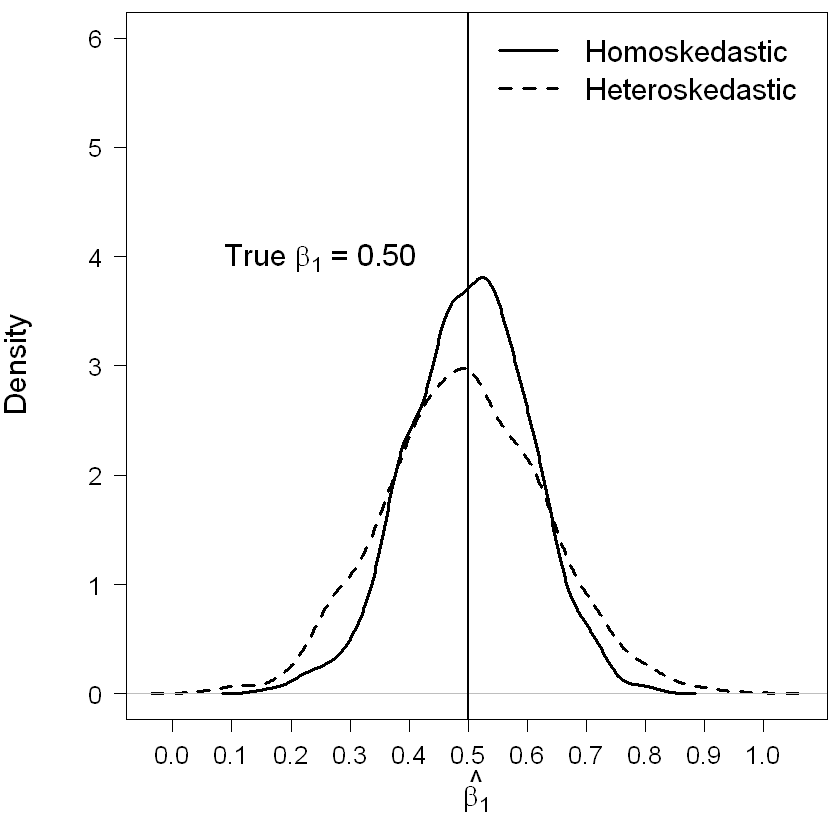

In [24]:
sigma <- mean(sigma.est)

set.seed(100484) # Set the seed for reproducible results

reps <- 1000 # Set the number of repetitions at the top of the script
par.est.ncv <- matrix(NA, nrow = reps, ncol = 6) # Empty matrix to store the
                                                 # estimates 
b0 <- .2 # True value for the intercept
b1 <- .5 # True value for the slope
n <- 1000 # Sample size
X <- runif(n, -1, 1) # Create a sample of n observations on the 
                     # independent variable X
gamma <- 1.5 # Heteroskedasticity parameter

for(i in 1:reps){ # Start the loop
Y1 <- b0 + b1*X + rnorm(n, 0, exp(X*gamma)) # Y1: Heteroskedasticity
Y2 <- b0 + b1*X + rnorm(n, 0, sigma) # Y2: Homoskedasticity, same average
                                     # sigma as Y1 
model1 <- lm(Y1 ~ X) # Estimate OLS models
model2 <- lm(Y2 ~ X)
vcv <- vcov(model1) # Variance-covariance matrix (model 1)
par.est.ncv[i, 1] <- model1$coef[1] # Put the estimate for the intercept
                                    # in the first column (model 1)
par.est.ncv[i, 2] <- model1$coef[2] # Put the estimate for the coefficient on
                                    # X in the second column (model 1)
par.est.ncv[i, 3] <- model2$coef[1] # Put the estimate for the intercept
                                    # in the first column (model 2)
par.est.ncv[i, 4] <- model2$coef[2] # Put the estimate for the coefficient on
                                    # X in the second column (model 2) 
par.est.ncv[i, 5] <- sqrt(diag(vcv)[1]) # SE of the intercept (model 1)
par.est.ncv[i, 6] <- sqrt(diag(vcv)[2]) # SE of the coefficient on X (model 1)
} # End the loop


par(mar = c(5, 5.25, .5, .5))
plot(density(par.est.ncv[ , 1]), lty = 2, ylim = c(0, 12), lwd = 3,
 xlab = "", ylab = "", main = "", axes = FALSE)
lines(density(par.est.ncv[ , 3]), lwd = 3)
axis(1, cex.axis = 1.25)
axis(2, cex.axis = 1.25, las = 2)
title(xlab = expression(hat(beta[0])), cex.lab = 1.5)
title(ylab = expression("Density"), line = 3.75, cex.lab = 1.5)
abline(v = b0, lwd = 2)
text(.1, 8, expression("True"~beta[0]~"= 0.20"), cex = 1.5)
box()
legend("topright", bty = "n", c(expression("Homoskedastic"),
 expression("Heteroskedastic")), lty = c(1, 2), lwd = 3, cex = 1.5)



par(mar = c(5, 5.25, .5, .5))
plot(density(par.est.ncv[ , 2]), lty = 2, ylim = c(0, 6), lwd = 3,
 xlab = "", ylab = "", main = "", axes = FALSE)
lines(density(par.est.ncv[ , 4]), lwd = 3)
axis(1, at = seq(0, 1, .1), cex.axis = 1.25)
axis(2, cex.axis = 1.25, las = 2)
title(xlab = expression(hat(beta[1])), cex.lab = 1.5)
title(ylab = expression("Density"), line = 3.75, cex.lab = 1.5)
abline(v = b1, lwd = 2)
text(.25, 4, expression("True"~beta[1]~"= 0.50"), cex = 1.5)
box()
legend("topright", bty = "n", c(expression("Homoskedastic"),
 expression("Heteroskedastic")), lty = c(1, 2), lwd = 3, cex = 1.5)



# Coverage Probabilities
cp.beta0.ncv <- coverage(par.est.ncv[ , 1], par.est.ncv[ , 5], b0,
 df = n - model1$rank)
cp.beta0.ncv$coverage.probability
cp.beta0.ncv$mc.eb

cp.beta1.ncv <- coverage(par.est.ncv[ , 2], par.est.ncv[ , 6], b1,
 df = n - model1$rank)

cover<-cp.beta1.ncv$coverage.probability
mc_conf<-cp.beta1.ncv$mc.eb
violation<-cbind(cover,mc_conf[1],mc_conf[2])


### 3.3 Address the violation with robust estimate

In [25]:
# Heteroskedasticity: Robust SEs (Simulation 3 of 3)
# Just simulate the version with heteroskedasticity, assess performance of
# robust standard errors
library(sandwich)

set.seed(100484) # Set the seed for reproducible results

reps <- 1000 # Set the number of repetitions at the top of the script
par.est.ncv <- matrix(NA, nrow = reps, ncol = 4) # Empty matrix to store the
                                                 # estimates 
b0 <- .2 # True value for the intercept
b1 <- .5 # True value for the slope
n <- 1000 # Sample size
X <- runif(n, -1, 1) # Create a sample of n observations on the 
                     # independent variable X
gamma <- 1.5 # Heteroskedasticity parameter

for(i in 1:reps){ # Start the loop
Y <- b0 + b1*X + rnorm(n, 0, exp(X*gamma)) # Now the error variance is a 
                                           # function of X plus random noise
model <- lm(Y ~ X) # Estimate OLS model
vcv <- vcovHC(model) # Robust variance-covariance matrix
par.est.ncv[i, 1] <- model$coef[1] # Put the estimate for the intercept
                                   # in the first column
par.est.ncv[i, 2] <- model$coef[2] # Put the estimate for the coefficient on
                                   # X in the second column
par.est.ncv[i, 3] <- sqrt(diag(vcv)[1]) # SE of the intercept
par.est.ncv[i, 4] <- sqrt(diag(vcv)[2]) # SE of the coefficient on X
} # End the loop

cp.beta1.ncv.robust <- coverage(par.est.ncv[ , 2], par.est.ncv[ , 4], b1,
 df = n - model$rank)

cover2<-cp.beta1.ncv.robust$coverage.probability
mc_conf2<-cp.beta1.ncv.robust$mc.eb # Simulation error
robust<-cbind(cover2,mc_conf2[1],mc_conf2[2])

In [26]:
### 3.4 Present results

In [27]:
result2<-rbind(violation,robust)
colnames(result2)<-c("Coverage Rate","Lower_95 CI","Upper_95 CI")
rownames(result2)<-c("Violation","Robust")
round(print(result2),3)

          Coverage Rate Lower_95 CI Upper_95 CI
Violation         0.852   0.8299907   0.8740093
Robust            0.938   0.9230530   0.9529470


,Coverage Rate,Lower_95 CI,Upper_95 CI
Violation,0.852,0.830,0.874
Robust,0.938,0.923,0.953
